<a href="https://colab.research.google.com/github/tariqrasheed172001/Prediction-of-Depression-levels./blob/main/Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Clustering

In [16]:
!pip install scikit-learn-extra scikit-fuzzy

import pandas as pd
import numpy as np
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
from sklearn.mixture import GaussianMixture
from sklearn_extra.cluster import KMedoids
import skfuzzy as fuzz
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from scipy.stats import mode


# Load the dataset
dataset = pd.read_csv('/content/dataset.csv')

In [17]:
label_encoder = LabelEncoder()

# keeping the first five columns for further analysis
textual_columns = dataset.iloc[:, :5].copy()

# Apply LabelEncoder to the first five columns
for col in dataset.columns[:5]:
    dataset[col] = label_encoder.fit_transform(dataset[col])

dataset.head()

,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,Q9,Q10,...,Q18,Q19,Q20,Q21,Q22,Q23,Q24,Q25,Q26,Q27
0,0,0,3,3,1,0,0,2,2,0,...,0,1,1,1,0,0,1,0,1,0
1,0,1,3,2,1,1,0,2,2,1,...,0,2,1,1,1,0,1,0,1,3
2,0,0,3,3,1,0,0,2,1,1,...,0,1,0,0,0,0,0,0,2,1
3,0,0,3,0,1,1,0,1,0,1,...,0,0,1,1,0,0,0,0,0,0
4,0,0,3,0,1,1,0,1,0,1,...,0,0,0,0,1,1,1,0,0,3


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


K-means: number of clusters = 6 and silhouette_score = 0.10218457189277079
Hierarchical: number of clusters = 6 and silhouette_score = 0.02048008362295082
DBSCAN clustering produced only one cluster.
GMM: number of clusters = 6 and silhouette_score = 0.12353735147099602
K-medoids: number of clusters = 6 and silhouette_score = 0.023004076470690256
Fuzzy C-means: number of clusters = 3 and silhouette_score = 0.0580896530426769


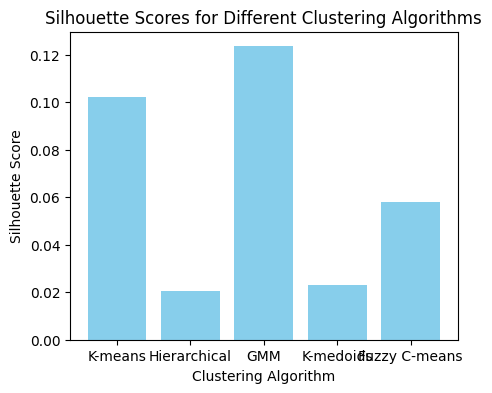

In [18]:
# Handle missing values
imputer = SimpleImputer(strategy='mean')
dataset_filled = pd.DataFrame(imputer.fit_transform(dataset), columns=dataset.columns)

# Assuming the dataset has features and possibly a target variable
# For clustering, we'll use only the feature columns
X = dataset_filled  # Adjust 'target_variable' to your actual target variable name

# Shuffle the dataset
X = X.sample(frac=1, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Define clustering algorithms
kmeans = KMeans(n_clusters=6, random_state=42)
hierarchical = AgglomerativeClustering(n_clusters=6)
dbscan = DBSCAN(eps=0.5, min_samples=6)
gmm = GaussianMixture(n_components=6, random_state=42)
kmedoids = KMedoids(n_clusters=6, random_state=42)

# Cluster the data using K-means
kmeans_labels = kmeans.fit_predict(X_scaled)

# Cluster the data using hierarchical clustering
hierarchical_labels = hierarchical.fit_predict(X_scaled)

# Cluster the data using DBSCAN
dbscan_labels = dbscan.fit_predict(X_scaled)

# Cluster the data using Gaussian mixture models (GMM)
gmm_labels = gmm.fit_predict(X_scaled)

# Cluster the data using K-medoids
kmedoids_labels = kmedoids.fit_predict(X_scaled)

# Cluster the data using Fuzzy C-means
cntr, u, u0, d, jm, p, fpc = fuzz.cluster.cmeans(X_scaled.T, 3, 2, error=0.005, maxiter=1000, init=None)
fuzzy_cmeans_labels = np.argmax(u, axis=0)

# Evaluate clustering using silhouette score
silhouette_scores = {}
clusters_info = {}

if len(np.unique(kmeans_labels)) > 1:
    kmeans_silhouette = silhouette_score(X_scaled, kmeans_labels)
    silhouette_scores['K-means'] = kmeans_silhouette
    clusters_info['K-means'] = len(np.unique(kmeans_labels))
    print("K-means: number of clusters =", len(np.unique(kmeans_labels)), "and silhouette_score =", kmeans_silhouette)
else:
    print("K-means clustering produced only one cluster.")

if len(np.unique(hierarchical_labels)) > 1:
    hierarchical_silhouette = silhouette_score(X_scaled, hierarchical_labels)
    silhouette_scores['Hierarchical'] = hierarchical_silhouette
    clusters_info['Hierarchical'] = len(np.unique(hierarchical_labels))
    print("Hierarchical: number of clusters =", len(np.unique(hierarchical_labels)), "and silhouette_score =", hierarchical_silhouette)
else:
    print("Hierarchical clustering produced only one cluster.")

if len(np.unique(dbscan_labels)) > 1:
    dbscan_silhouette = silhouette_score(X_scaled, dbscan_labels)
    silhouette_scores['DBSCAN'] = dbscan_silhouette
    clusters_info['DBSCAN'] = len(np.unique(dbscan_labels))
    print("DBSCAN: number of clusters =", len(np.unique(dbscan_labels)), "and silhouette_score =", dbscan_silhouette)
else:
    print("DBSCAN clustering produced only one cluster.")

if len(np.unique(gmm_labels)) > 1:
    gmm_silhouette = silhouette_score(X_scaled, gmm_labels)
    silhouette_scores['GMM'] = gmm_silhouette
    clusters_info['GMM'] = len(np.unique(gmm_labels))
    print("GMM: number of clusters =", len(np.unique(gmm_labels)), "and silhouette_score =", gmm_silhouette)
else:
    print("GMM clustering produced only one cluster.")

if len(np.unique(kmedoids_labels)) > 1:
    kmedoids_silhouette = silhouette_score(X_scaled, kmedoids_labels)
    silhouette_scores['K-medoids'] = kmedoids_silhouette
    clusters_info['K-medoids'] = len(np.unique(kmedoids_labels))
    print("K-medoids: number of clusters =", len(np.unique(kmedoids_labels)), "and silhouette_score =", kmedoids_silhouette)
else:
    print("K-medoids clustering produced only one cluster.")

if len(np.unique(fuzzy_cmeans_labels)) > 1:
    fuzzy_cmeans_silhouette = silhouette_score(X_scaled, fuzzy_cmeans_labels)
    silhouette_scores['Fuzzy C-means'] = fuzzy_cmeans_silhouette
    clusters_info['Fuzzy C-means'] = len(np.unique(fuzzy_cmeans_labels))
    print("Fuzzy C-means: number of clusters =", len(np.unique(fuzzy_cmeans_labels)), "and silhouette_score =", fuzzy_cmeans_silhouette)
else:
    print("Fuzzy C-means clustering produced only one cluster.")

# Plot the silhouette scores for each clustering algorithm
plt.figure(figsize=(5, 4))
plt.bar(silhouette_scores.keys(), silhouette_scores.values(), color='skyblue')
plt.title('Silhouette Scores for Different Clustering Algorithms')
plt.xlabel('Clustering Algorithm')
plt.ylabel('Silhouette Score')
plt.show()

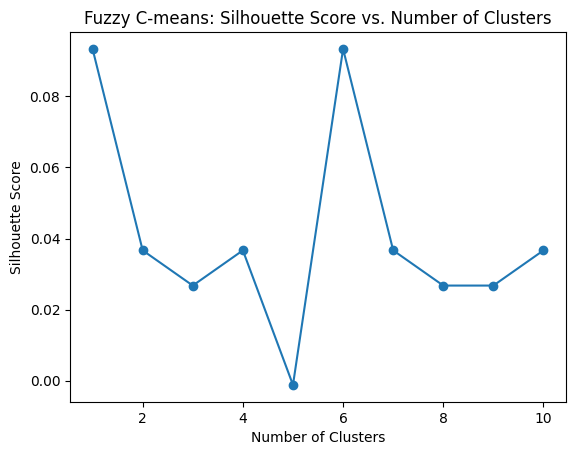

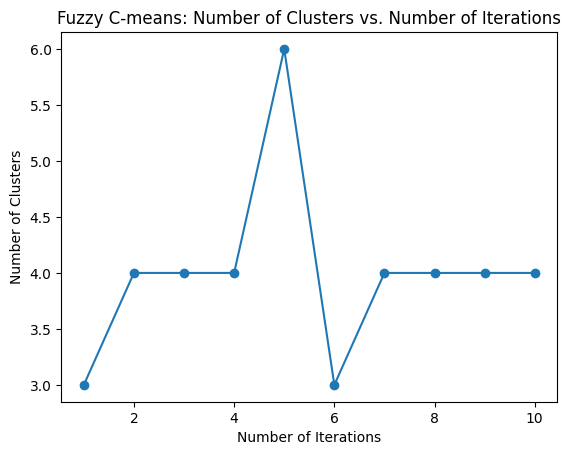

In [19]:
# Function to run Fuzzy C-means for a range of cluster numbers and calculate FPC
def run_fuzzy_cmeans(X, number_iterations):
    silhouette_scores = []
    num_clusters_list = []

    for _ in range(number_iterations):  # Iterate 10 times
        fpcs = []  # Initialize fpcs list for each iteration

        for num_clusters in range(2, 11):  # Iterate over potential number of clusters
            cntr, u, u0, d, jm, p, fpc = fuzz.cluster.cmeans(X.T, num_clusters, 6, error=0.005, maxiter=1000, init=None)
            fpcs.append(fpc)  # Append fpc for the current number of clusters

        # Determine the optimal number of clusters from the elbow plot
        optimal_clusters = np.argmax(np.diff(fpcs)) + 2

        # Run Fuzzy C-means with the optimal number of clusters
        cntr, u, u0, d, jm, p, fpc = fuzz.cluster.cmeans(X.T, optimal_clusters, 2, error=0.005, maxiter=1000, init=None)
        fuzzy_cmeans_labels = np.argmax(u, axis=0)

        # Evaluate clustering using silhouette score
        if len(np.unique(fuzzy_cmeans_labels)) > 1:
            fuzzy_cmeans_silhouette = silhouette_score(X, fuzzy_cmeans_labels)
            silhouette_scores.append(fuzzy_cmeans_silhouette)
            num_clusters_list.append(len(np.unique(fuzzy_cmeans_labels)))

    return silhouette_scores, num_clusters_list

# Run Fuzzy C-means for a range of cluster numbers
number_iterations = 10
silhouette_scores, num_clusters_list = run_fuzzy_cmeans(X_scaled, number_iterations)


# Plot number of clusters vs silhouette score
plt.plot(range(1, number_iterations + 1), silhouette_scores, marker='o')
plt.title('Fuzzy C-means: Silhouette Score vs. Number of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.show()

# Plot number of clusters vs number of iterations
plt.plot(range(1, number_iterations + 1), num_clusters_list, marker='o')
plt.title('Fuzzy C-means: Number of Clusters vs. Number of Iterations')
plt.xlabel('Number of Iterations')
plt.ylabel('Number of Clusters')
plt.show()

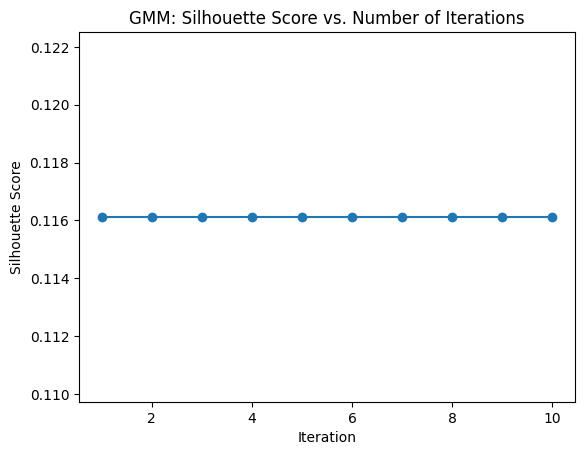

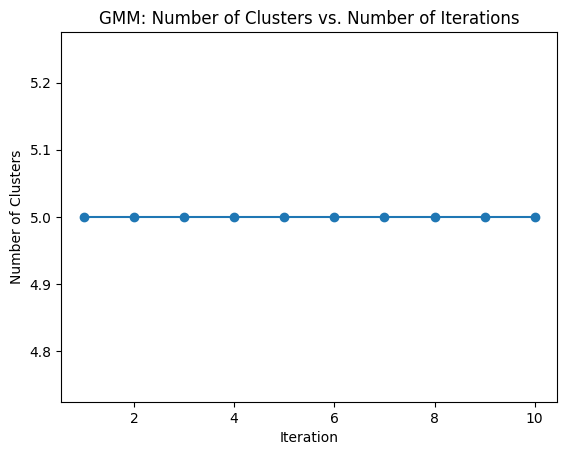

In [20]:
def run_gmm(X, number_iterations):
    silhouette_scores = []
    num_clusters_list = []

    for _ in range(number_iterations):
        gmm = GaussianMixture(n_components=5, random_state=42)  # Keeping the number of components constant
        gmm.fit(X)
        gmm_labels = gmm.predict(X)

        if len(np.unique(gmm_labels)) > 1:
            gmm_silhouette = silhouette_score(X, gmm_labels)
            silhouette_scores.append(gmm_silhouette)
            num_clusters_list.append(len(np.unique(gmm_labels)))

    return silhouette_scores, num_clusters_list

# Assuming X_scaled is your scaled data
number_iterations = 10
silhouette_scores_gmm, num_clusters_list_gmm = run_gmm(X_scaled, number_iterations)

# Plotting silhouette scores vs. number of clusters
plt.plot(range(1, number_iterations + 1), silhouette_scores_gmm, marker='o')
plt.title('GMM: Silhouette Score vs. Number of Iterations')
plt.xlabel('Iteration')
plt.ylabel('Silhouette Score')
plt.show()

# Plotting number of clusters vs. number of iterations
plt.plot(range(1, number_iterations + 1), num_clusters_list_gmm, marker='o')
plt.title('GMM: Number of Clusters vs. Number of Iterations')
plt.xlabel('Iteration')
plt.ylabel('Number of Clusters')
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

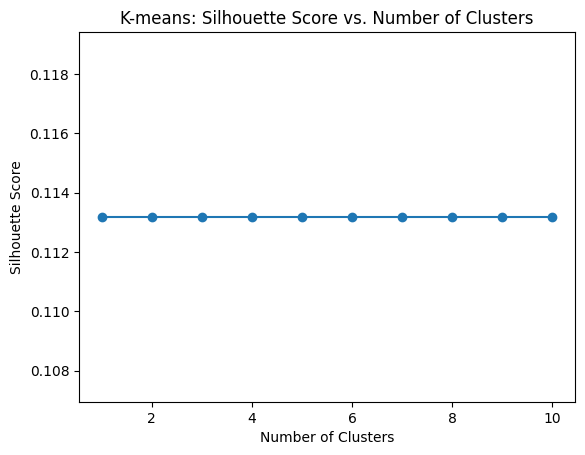

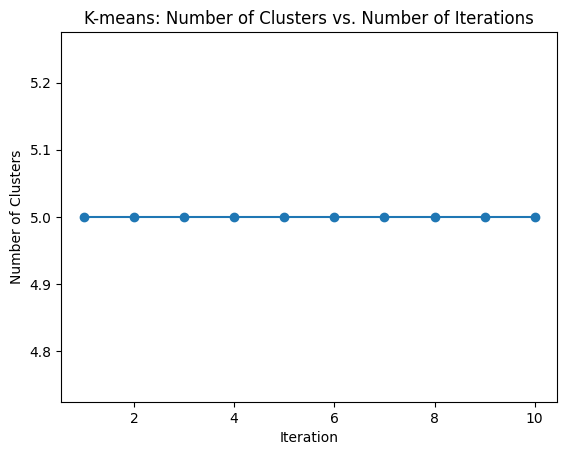

In [21]:
def run_kmeans(X, number_iterations):
    silhouette_scores = []
    num_clusters_list = []

    for _ in range(number_iterations):  # Iterate 10 times
        kmeans = KMeans(n_clusters=5, random_state=42)
        kmeans.fit(X)
        kmeans_labels = kmeans.labels_

        # Evaluate clustering using silhouette score
        if len(np.unique(kmeans_labels)) > 1:
            kmeans_silhouette = silhouette_score(X, kmeans_labels)
            silhouette_scores.append(kmeans_silhouette)
            num_clusters_list.append(len(np.unique(kmeans_labels)))


    return silhouette_scores, num_clusters_list

# Run K-means for a range of cluster numbers
number_iterations = 10
silhouette_scores_kmeans, num_clusters_list_kmeans = run_kmeans(X_scaled, number_iterations)

# Plotting silhouette scores vs. number of clusters
plt.plot(range(1, number_iterations + 1), silhouette_scores_kmeans, marker='o')
plt.title('K-means: Silhouette Score vs. Number of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.show()

# Plotting silhouette scores vs. number of clusters
plt.plot(range(1, number_iterations + 1), num_clusters_list_kmeans, marker='o')
plt.title('K-means: Number of Clusters vs. Number of Iterations')
plt.xlabel('Iteration')
plt.ylabel('Number of Clusters')
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

Number of optimal clusters for k-means =  5


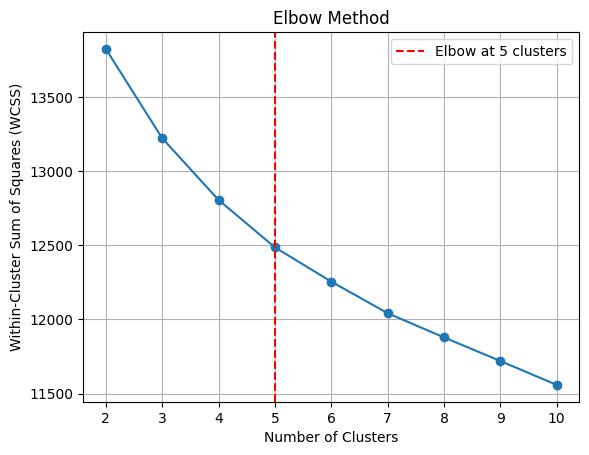

In [22]:
!pip install kneed

import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import numpy as np
from kneed import KneeLocator

# Assuming X_scaled is your preprocessed and scaled data

# Initialize an empty list to store within-cluster sum of squares (WCSS)
wcss = []

# Define a range of cluster numbers to try
cluster_range = range(2, 11)  # Adjust as needed

# Loop through the range of cluster numbers
for num_clusters in cluster_range:
    # Fit KMeans clustering algorithm to the data
    kmeans = KMeans(n_clusters=num_clusters, random_state=42)
    kmeans.fit(X_scaled)

    # Append the WCSS value to the list
    wcss.append(kmeans.inertia_)

# Plot the elbow curve
plt.plot(cluster_range, wcss, marker='o', linestyle='-')
plt.xlabel('Number of Clusters')
plt.ylabel('Within-Cluster Sum of Squares (WCSS)')
plt.title('Elbow Method')

kl = KneeLocator(
    range(2, 11), wcss, curve="convex", direction="decreasing"
)

print("Number of optimal clusters for k-means = ",kl.elbow)

elbow_point = kl.elbow
plt.axvline(x=elbow_point, color='r', linestyle='--', label=f'Elbow at {elbow_point} clusters')

plt.xticks(np.arange(min(cluster_range), max(cluster_range)+1, 1.0))
plt.grid(True)
plt.legend()
plt.show()


In [23]:
X = X.sort_index()

In [24]:
def label_columns(df):
    # Calculate the sum of columns from column 6 to 27
    sum_of_columns = df.iloc[:, 6:28].sum(axis=1)

    # Assign labels based on the sum
    labels = []
    for sum_val in sum_of_columns:
        if 0 <= sum_val <= 13:
            labels.append(0)
        elif 14 <= sum_val <= 26:
            labels.append(1)
        elif 27 <= sum_val <= 39:
            labels.append(2)
        elif 40 <= sum_val <= 52:
            labels.append(3)
        else:
            labels.append(4)

    # Add the labels to the DataFrame
    df['Depression'] = labels

    return df

label_columns(X)

,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,Q9,Q10,...,Q19,Q20,Q21,Q22,Q23,Q24,Q25,Q26,Q27,Depression
0,0.0,0.0,3.0,3.0,1.0,0.0,0.0,2.0,2.0,0.0,...,1.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1
1,0.0,1.0,3.0,2.0,1.0,1.0,0.0,2.0,2.0,1.0,...,2.0,1.0,1.0,1.0,0.0,1.0,0.0,1.0,3.0,1
2,0.0,0.0,3.0,3.0,1.0,0.0,0.0,2.0,1.0,1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,1.0,0
3,0.0,0.0,3.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,...,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0
4,0.0,0.0,3.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,...,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,3.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
635,1.0,0.0,0.0,1.0,1.0,2.0,2.0,0.0,3.0,3.0,...,1.0,0.0,3.0,3.0,2.0,0.0,2.0,0.0,1.0,2
636,1.0,1.0,1.0,8.0,1.0,3.0,0.0,0.0,2.0,3.0,...,2.0,0.0,1.0,3.0,2.0,1.0,2.0,2.0,1.0,2
637,1.0,0.0,2.0,8.0,0.0,3.0,3.0,2.0,3.0,0.0,...,2.0,3.0,0.0,3.0,2.0,2.0,0.0,1.0,3.0,2
638,1.0,0.0,2.0,7.0,1.0,2.0,0.0,0.0,0.0,3.0,...,1.0,1.0,2.0,2.0,1.0,3.0,1.0,1.0,3.0,2


In [25]:
X.to_csv('labeled_dataset.csv', index=False)

In [26]:
def label_columns(df):
    # Calculate the sum of columns from column 6 to 27
    sum_of_columns = df.iloc[:, 6:28].sum(axis=1)

    # Assign labels based on the sum
    labels = []
    for sum_val in sum_of_columns:
        if 0 <= sum_val <= 13:
            labels.append("Minimal")
        elif 14 <= sum_val <= 26:
            labels.append("Mild")
        elif 27 <= sum_val <= 39:
            labels.append("Moderate")
        elif 40 <= sum_val <= 52:
            labels.append("Severe")
        else:
            labels.append("Extreme")

    # Add the labels to the DataFrame
    df['Depression'] = labels

    return df

label_columns(X)

# Replace the first five columns of Temp_data_set with textual_columns
X.iloc[:, :5] = textual_columns

# Display the first few rows of Temp_data_set to verify the replacement
X.head()

,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,Q9,Q10,...,Q19,Q20,Q21,Q22,Q23,Q24,Q25,Q26,Q27,Depression
0,B.Tech,17-22,Third Year,ECE,Male,0.0,0.0,2.0,2.0,0.0,...,1.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,Mild
1,B.Tech,23-28,Third Year,CSE,Male,1.0,0.0,2.0,2.0,1.0,...,2.0,1.0,1.0,1.0,0.0,1.0,0.0,1.0,3.0,Mild
2,B.Tech,17-22,Third Year,ECE,Male,0.0,0.0,2.0,1.0,1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,1.0,Minimal
3,B.Tech,17-22,Third Year,CHEM,Male,1.0,0.0,1.0,0.0,1.0,...,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,Minimal
4,B.Tech,17-22,Third Year,CHEM,Male,1.0,0.0,1.0,0.0,1.0,...,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,3.0,Mild


<ipython-input-31-bae6a3022a71>:29: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(ax=axes[i], x=depression_counts.index, y=depression_counts.values, palette='viridis')
<ipython-input-31-bae6a3022a71>:29: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(ax=axes[i], x=depression_counts.index, y=depression_counts.values, palette='viridis')
<ipython-input-31-bae6a3022a71>:29: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(ax=axes[i], x=depression_counts.index, y=depression_counts.values, palette='viridis')
<ipython-input-31-bae6a3022a71>:29: FutureW

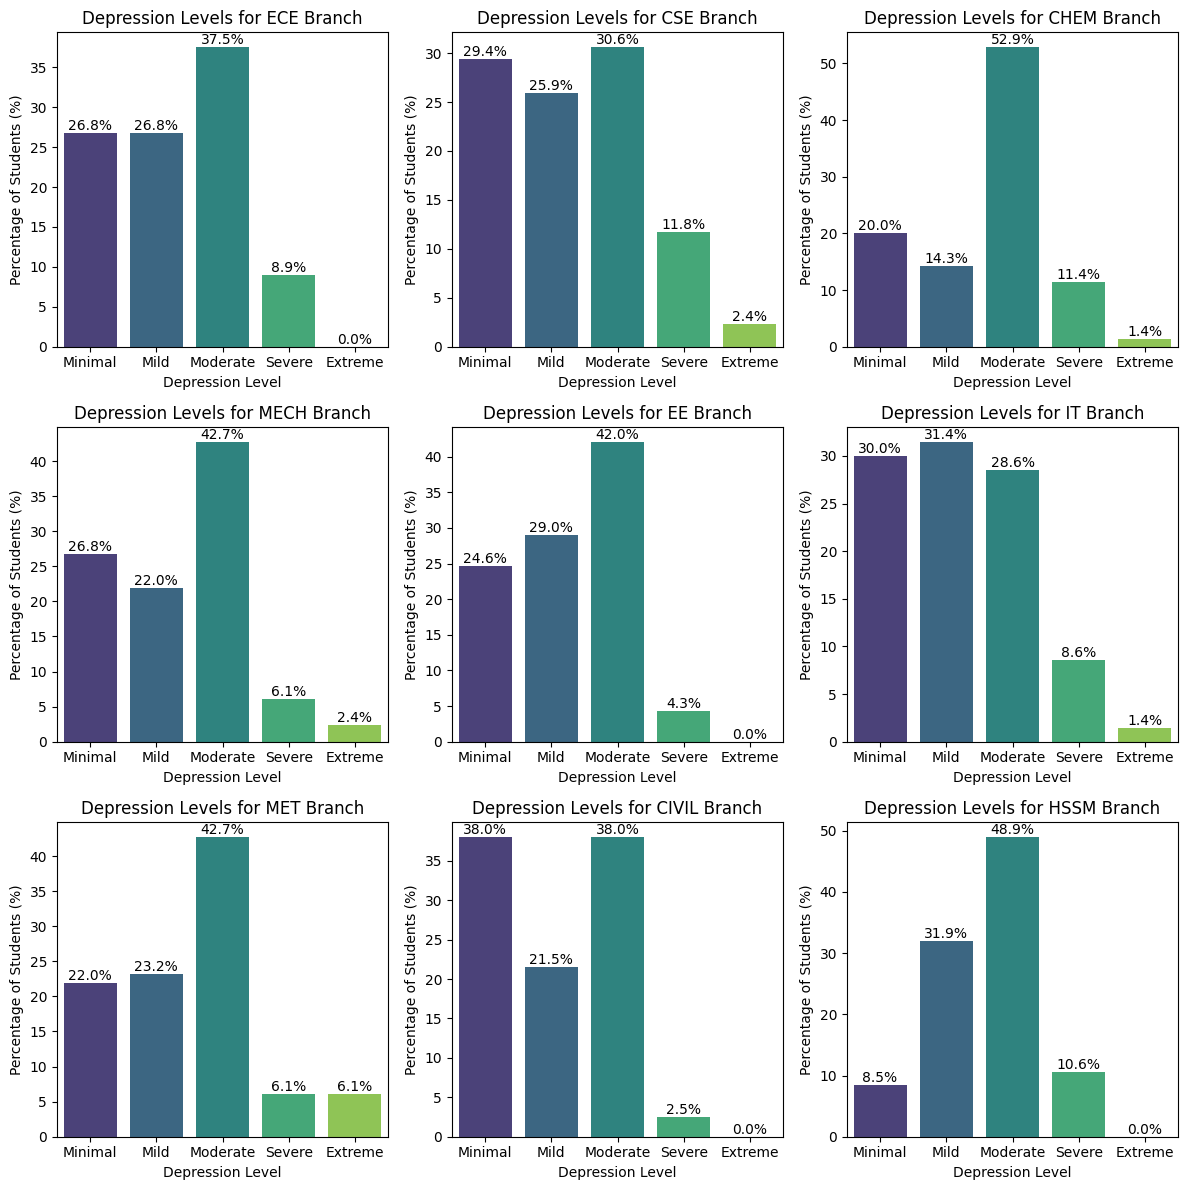

In [31]:
import seaborn as sns

# Assuming X is your DataFrame and it's already loaded

# Unique branches in the dataset
branches = X['Q4'].unique()

# Define the categories for the severity levels
severity_levels = ['Minimal', 'Mild', 'Moderate', 'Severe', 'Extreme']

# Determine the number of rows and columns for the grid
num_branches = len(branches)
cols = 3  # Number of columns (adjust as needed)
rows = (num_branches + cols - 1) // cols  # Calculate number of rows needed

# Create subplots
fig, axes = plt.subplots(nrows=rows, ncols=cols, figsize=(12, 4 * rows))
axes = axes.flatten()  # Flatten the axes array for easy indexing

# Plot each branch in a separate subplot
for i, branch in enumerate(branches):
    branch_data = X[X['Q4'] == branch]
    depression_counts = branch_data['Depression'].value_counts(normalize=True) * 100  # Calculate percentages

    # Reindex to include all severity levels, filling missing ones with zeros
    depression_counts = depression_counts.reindex(severity_levels, fill_value=0)

    # Plot the barplot
    sns.barplot(ax=axes[i], x=depression_counts.index, y=depression_counts.values, palette='viridis')

    # Annotate each bar with its percentage value
    for bar, percentage in zip(axes[i].patches, depression_counts.values):
        text_x = bar.get_x() + bar.get_width() / 2.0
        text_y = bar.get_height()
        text = f'{percentage:.1f}%'  # Format the percentage value
        axes[i].text(text_x, text_y, text, ha='center', va='bottom', fontsize=10)

    axes[i].set_title(f'Depression Levels for {branch} Branch')
    axes[i].set_xlabel('Depression Level')
    axes[i].set_ylabel('Percentage of Students (%)')

# Hide any unused subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


<ipython-input-32-eb2800f1a800>:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(ax=axes[i], x=depression_counts.index, y=depression_counts.values, palette='viridis')
<ipython-input-32-eb2800f1a800>:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(ax=axes[i], x=depression_counts.index, y=depression_counts.values, palette='viridis')


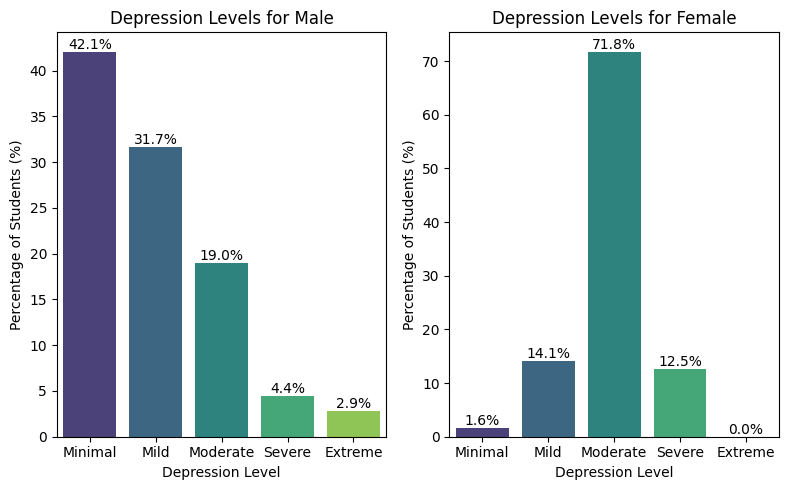

In [32]:
# Define the categories for the severity levels
severity_levels = ['Minimal', 'Mild', 'Moderate', 'Severe', 'Extreme']

# Unique genders in the dataset
genders = X['Q5'].unique()

# Determine the number of rows and columns for the grid
num_genders = len(genders)
cols = 2  # Number of columns (adjust as needed)
rows = (num_genders + cols - 1) // cols  # Calculate number of rows needed

# Create subplots
fig, axes = plt.subplots(nrows=rows, ncols=cols, figsize=(8, 5 * rows))
axes = axes.flatten()  # Flatten the axes array for easy indexing

# Plot each gender in a separate subplot
for i, gender in enumerate(genders):
    gender_data = X[X['Q5'] == gender]
    depression_counts = gender_data['Depression'].value_counts(normalize=True) * 100  # Calculate percentages

    # Reindex to include all severity levels, filling missing ones with zeros
    depression_counts = depression_counts.reindex(severity_levels, fill_value=0)

    # Plot the barplot
    sns.barplot(ax=axes[i], x=depression_counts.index, y=depression_counts.values, palette='viridis')

    # Annotate each bar with its percentage value
    for bar, percentage in zip(axes[i].patches, depression_counts.values):
        text_x = bar.get_x() + bar.get_width() / 2.0
        text_y = bar.get_height()
        text = f'{percentage:.1f}%'  # Format the percentage value
        axes[i].text(text_x, text_y, text, ha='center', va='bottom', fontsize=10)

    axes[i].set_title(f'Depression Levels for {gender}')
    axes[i].set_xlabel('Depression Level')
    axes[i].set_ylabel('Percentage of Students (%)')

# Hide any unused subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


<ipython-input-33-fda10a61c657>:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(ax=axes[i], x=depression_counts.index, y=depression_counts.values, palette='viridis')
<ipython-input-33-fda10a61c657>:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(ax=axes[i], x=depression_counts.index, y=depression_counts.values, palette='viridis')
<ipython-input-33-fda10a61c657>:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(ax=axes[i], x=depression_counts.index, y=depression_counts.values, palette='viridis')
<ipython-input-33-fda10a61c657>:25: FutureW

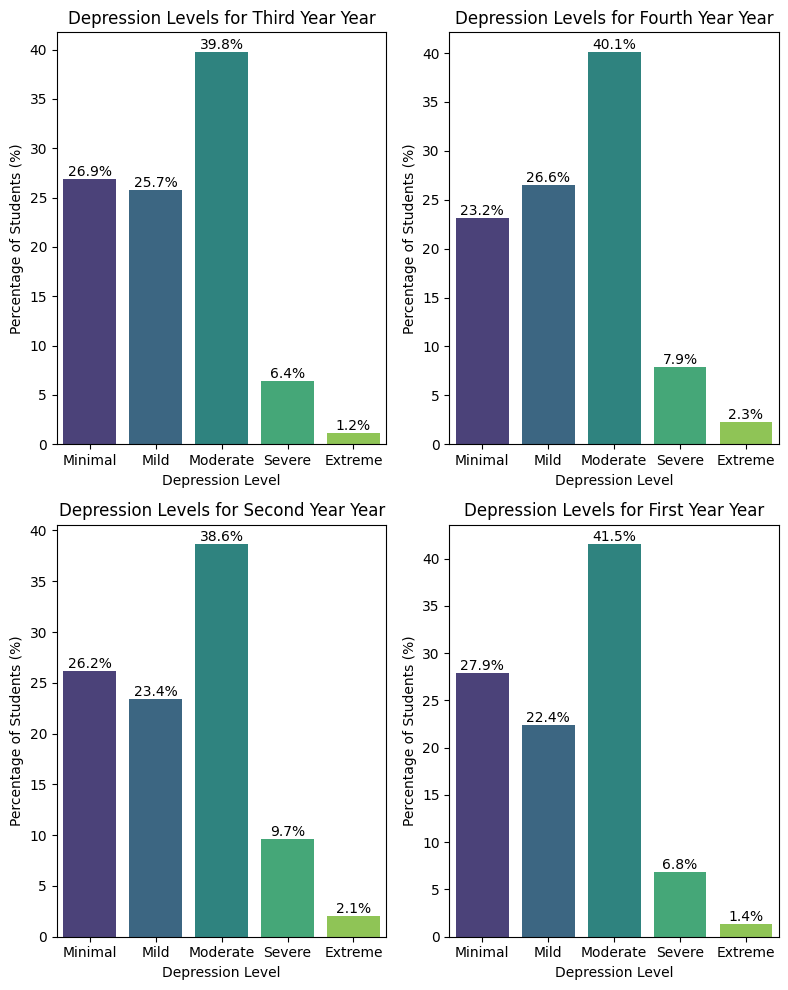

In [33]:
# Define the categories for the severity levels
severity_levels = ['Minimal', 'Mild', 'Moderate', 'Severe', 'Extreme']

# Unique years in the dataset
years = X['Q3'].unique()

# Determine the number of rows and columns for the grid
num_years = len(years)
cols = 2  # Number of columns (adjust as needed)
rows = (num_years + cols - 1) // cols  # Calculate number of rows needed

# Create subplots
fig, axes = plt.subplots(nrows=rows, ncols=cols, figsize=(8, 5 * rows))
axes = axes.flatten()  # Flatten the axes array for easy indexing

# Plot each year in a separate subplot
for i, year in enumerate(years):
    year_data = X[X['Q3'] == year]
    depression_counts = year_data['Depression'].value_counts(normalize=True) * 100  # Calculate percentages

    # Reindex to include all severity levels, filling missing ones with zeros
    depression_counts = depression_counts.reindex(severity_levels, fill_value=0)

    # Plot the barplot
    sns.barplot(ax=axes[i], x=depression_counts.index, y=depression_counts.values, palette='viridis')

    # Annotate each bar with its percentage value
    for bar, percentage in zip(axes[i].patches, depression_counts.values):
        text_x = bar.get_x() + bar.get_width() / 2.0
        text_y = bar.get_height()
        text = f'{percentage:.1f}%'  # Format the percentage value
        axes[i].text(text_x, text_y, text, ha='center', va='bottom', fontsize=10)

    axes[i].set_title(f'Depression Levels for {year} Year')
    axes[i].set_xlabel('Depression Level')
    axes[i].set_ylabel('Percentage of Students (%)')

# Hide any unused subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


<ipython-input-34-a42e69e80fb8>:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(ax=axes[i], x=depression_counts.index, y=depression_counts.values, palette='viridis')
<ipython-input-34-a42e69e80fb8>:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(ax=axes[i], x=depression_counts.index, y=depression_counts.values, palette='viridis')
<ipython-input-34-a42e69e80fb8>:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(ax=axes[i], x=depression_counts.index, y=depression_counts.values, palette='viridis')


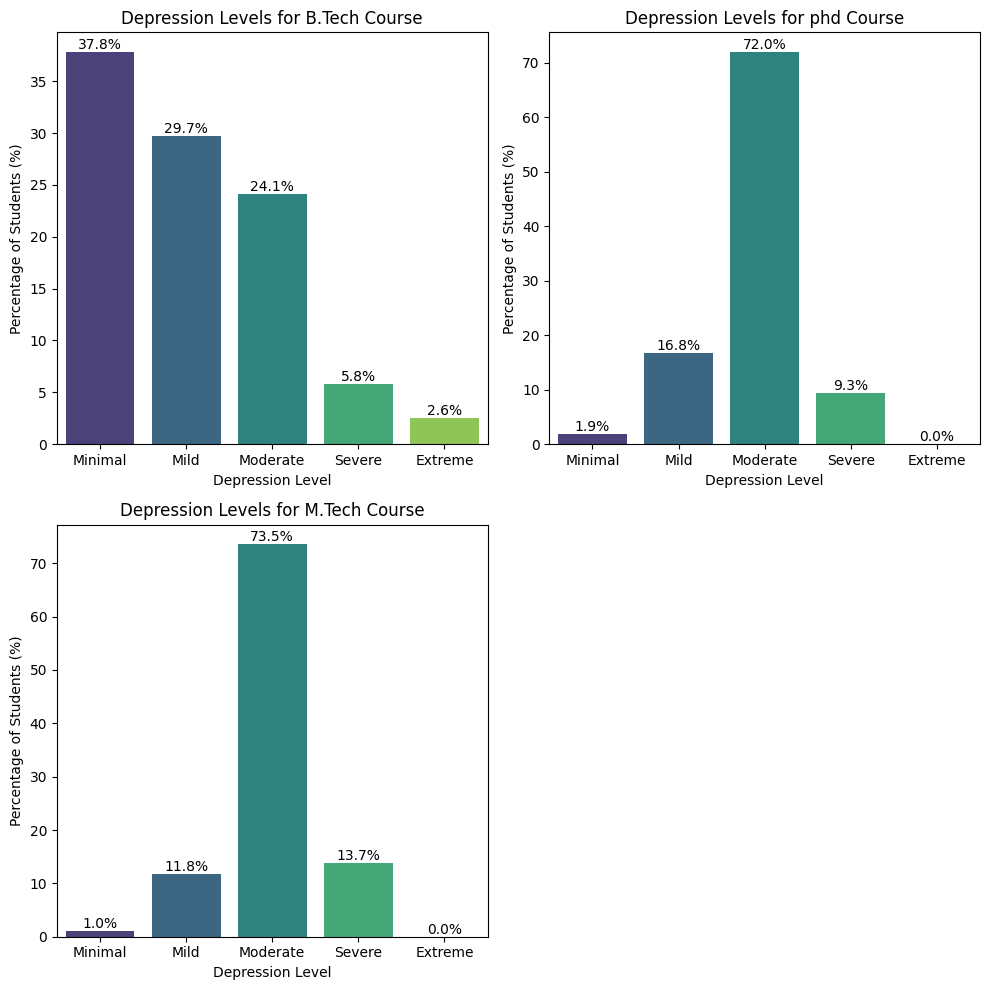

In [34]:
# Define the categories for the severity levels
severity_levels = ['Minimal', 'Mild', 'Moderate', 'Severe', 'Extreme']

# Unique courses in the dataset
courses = X['Q1'].unique()

# Determine the number of rows and columns for the grid
num_courses = len(courses)
cols = 2  # Number of columns (adjust as needed)
rows = (num_courses + cols - 1) // cols  # Calculate number of rows needed

# Create subplots
fig, axes = plt.subplots(nrows=rows, ncols=cols, figsize=(10, 5 * rows))
axes = axes.flatten()  # Flatten the axes array for easy indexing

# Plot each course in a separate subplot
for i, course in enumerate(courses):
    course_data = X[X['Q1'] == course]
    depression_counts = course_data['Depression'].value_counts(normalize=True) * 100  # Calculate percentages

    # Reindex to include all severity levels, filling missing ones with zeros
    depression_counts = depression_counts.reindex(severity_levels, fill_value=0)

    # Plot the barplot
    sns.barplot(ax=axes[i], x=depression_counts.index, y=depression_counts.values, palette='viridis')

    # Annotate each bar with its percentage value
    for bar, percentage in zip(axes[i].patches, depression_counts.values):
        text_x = bar.get_x() + bar.get_width() / 2.0
        text_y = bar.get_height()
        text = f'{percentage:.1f}%'  # Format the percentage value
        axes[i].text(text_x, text_y, text, ha='center', va='bottom', fontsize=10)

    axes[i].set_title(f'Depression Levels for {course} Course')
    axes[i].set_xlabel('Depression Level')
    axes[i].set_ylabel('Percentage of Students (%)')

# Hide any unused subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()
